# 🧮 Sales Performance Analysis & Forecasting

### 📌 Objective:
Analyze sales data to uncover trends and forecast future performance using Python and Facebook Prophet.

**Dataset:** Superstore Sales Data  
**Tools:** Python, Pandas, Seaborn, Matplotlib, Plotly, Prophet  
**Platform:** Google Colab


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load the data
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

# Check basic structure
print(df.shape)
print(df.columns)
print(df.head())

# Clean column names (optional)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Convert Order Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Add Profit Margin column
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Check for missing values
print(df.isnull().sum())


(9994, 21)
Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        

## 🧹 Data Cleaning & Preprocessing

- Renaming columns for easier access  
- Converting date columns  
- Calculating profit margins  
- Checking for missing values


/tmp/ipython-input-5-1825096387.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order_Date')['Sales'].resample('M').sum().plot(figsize=(10,5), title='Monthly Sales Trend')


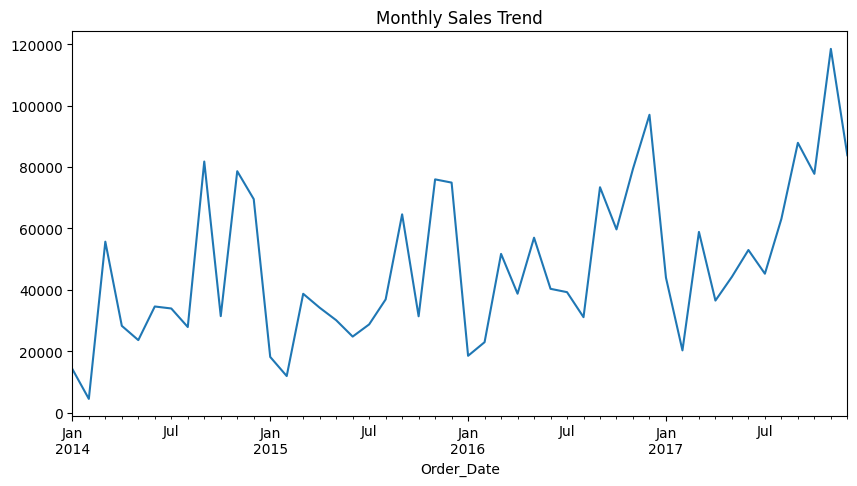

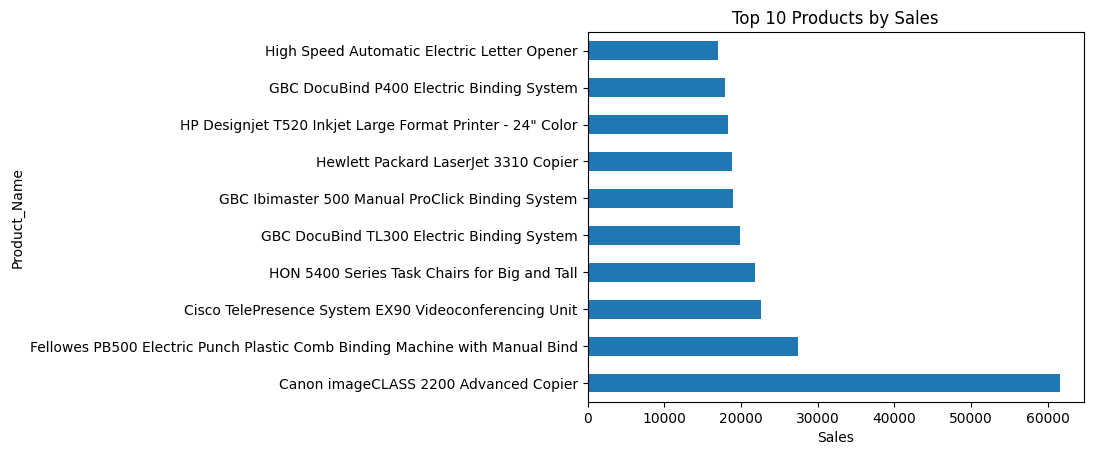

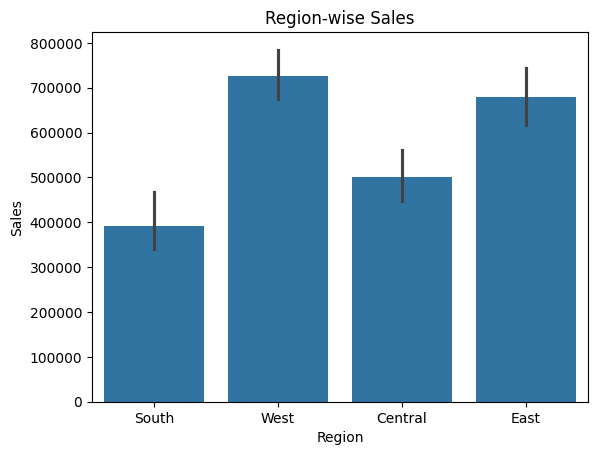

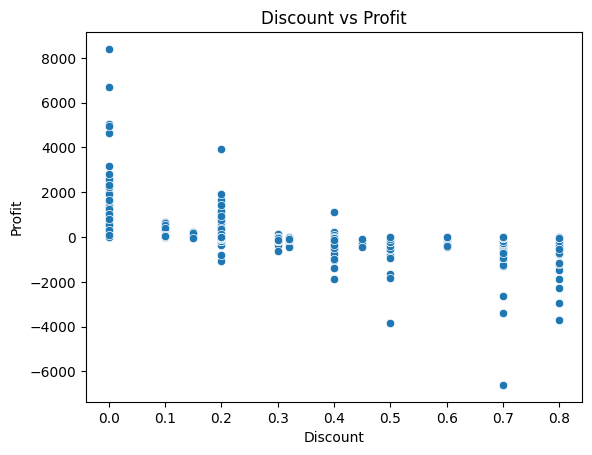

In [5]:
# Sales Over Time
df.set_index('Order_Date')['Sales'].resample('M').sum().plot(figsize=(10,5), title='Monthly Sales Trend')
plt.show()

# Top 10 Products by Sales
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales')
plt.xlabel('Sales')
plt.show()

# Region-wise Sales
sns.barplot(data=df, x='Region', y='Sales', estimator=sum)
plt.title('Region-wise Sales')
plt.show()

# Discount vs Profit
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()


## 📊 Exploratory Data Analysis

We’ll visualize:
- Monthly sales trend
- Top 10 products by sales
- Region-wise performance
- Discount vs Profit


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzy0zd2se/twiy6bd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzy0zd2se/cprp6m3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80562', 'data', 'file=/tmp/tmpzy0zd2se/twiy6bd6.json', 'init=/tmp/tmpzy0zd2se/cprp6m3w.json', 'output', 'file=/tmp/tmpzy0zd2se/prophet_modelkimmv90t/prophet_model-20250717035136.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:51:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


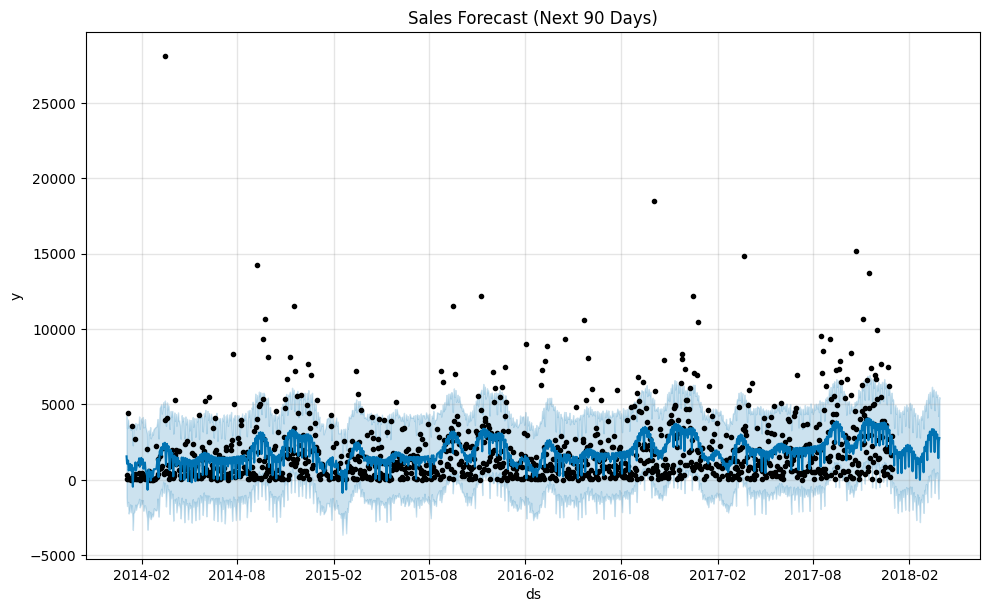

In [6]:
# Prepare data for forecasting
sales_df = df[['Order_Date', 'Sales']].copy()
sales_df = sales_df.groupby('Order_Date').sum().reset_index()
sales_df.columns = ['ds', 'y']  # Prophet requires these column names

# Forecast using Prophet
model = Prophet()
model.fit(sales_df)

# Create future dataframe
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast (Next 90 Days)')
plt.show()
